In [1]:
from functions import *
from import_data import *

from astropy.constants import R_sun, L_sun, sigma_sb
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

In [2]:
df_falenga = falenga()
df_MRL = pd.read_csv("tables/results/MassRadiusLuminosity.csv")

<font color='yellow' size=5> Plots </font>

[[0.157140085313231, 0.121235698206565, 0.142899100843769, 0.12231002388294, 0.150146188905286, 0.157392846452275, 0.16241914475541], [0.143489131132347, 0.120150731506248, 0.142899100843769, 0.128182059922037, 0.141978436244812, 0.174156767537316, 0.165538046301863]]


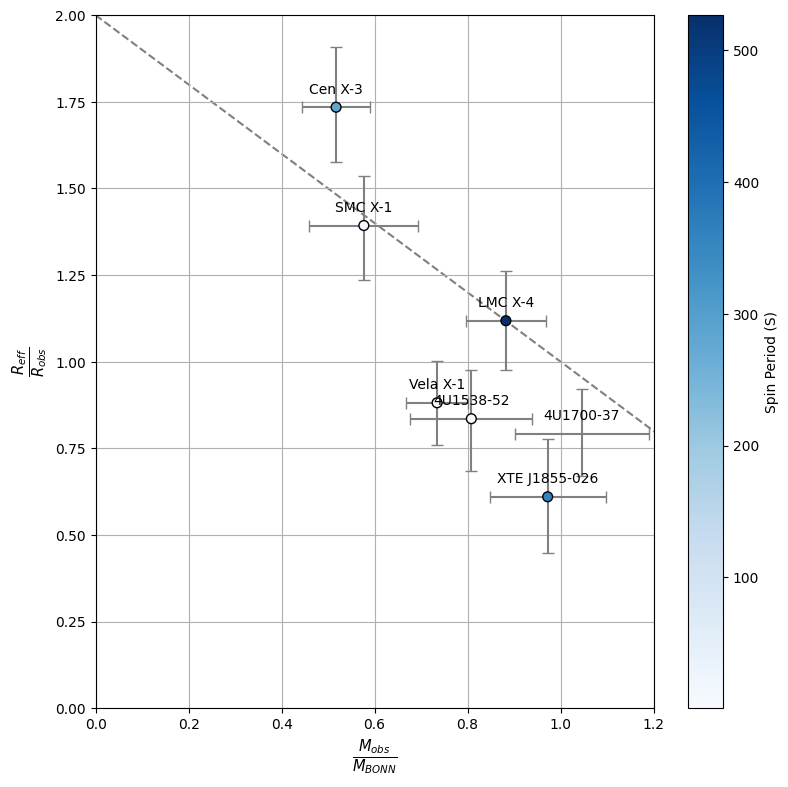

In [3]:
R_asymmetric_err = [df_MRL['R_expected/R_true_err_low'].tolist(), df_MRL['R_expected/R_true_err_high'].tolist()]
print(R_asymmetric_err)
plt.figure(figsize=(9,9))
plt.errorbar(df_MRL["M_opt/M_exp"], df_MRL["R_expected/R_true"], yerr=R_asymmetric_err, xerr=df_MRL["M_opt/M_exp_err"], fmt='none', ecolor='gray', capsize=4, zorder=2)
plt.scatter(df_MRL["M_opt/M_exp"], df_MRL["R_expected/R_true"], c=pd.merge(df_falenga, df_MRL, on='id')['P_spin'].tolist(), cmap='Blues', edgecolors='black', s=50, zorder=3)
plt.colorbar(label='Spin Period (S)')  # Add color bar with label
plt.plot([0, 2], [2, 0], linestyle='--', color='grey', zorder=1)
# Add labels to each point
for i, label in enumerate(df_MRL["id"].tolist()):
    plt.annotate(label, (df_MRL["M_opt/M_exp"].tolist()[i], df_MRL["R_expected/R_true"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.ylim(0, 2)
plt.xlim(0, 1.2)
plt.grid(True)
plt.xlabel(r"$\frac{M_{obs}}{M_{BONN}}$", fontsize=15)
plt.ylabel(r"$\frac{R_{eff}}{R_{obs}}$", fontsize=15)
plt.show()

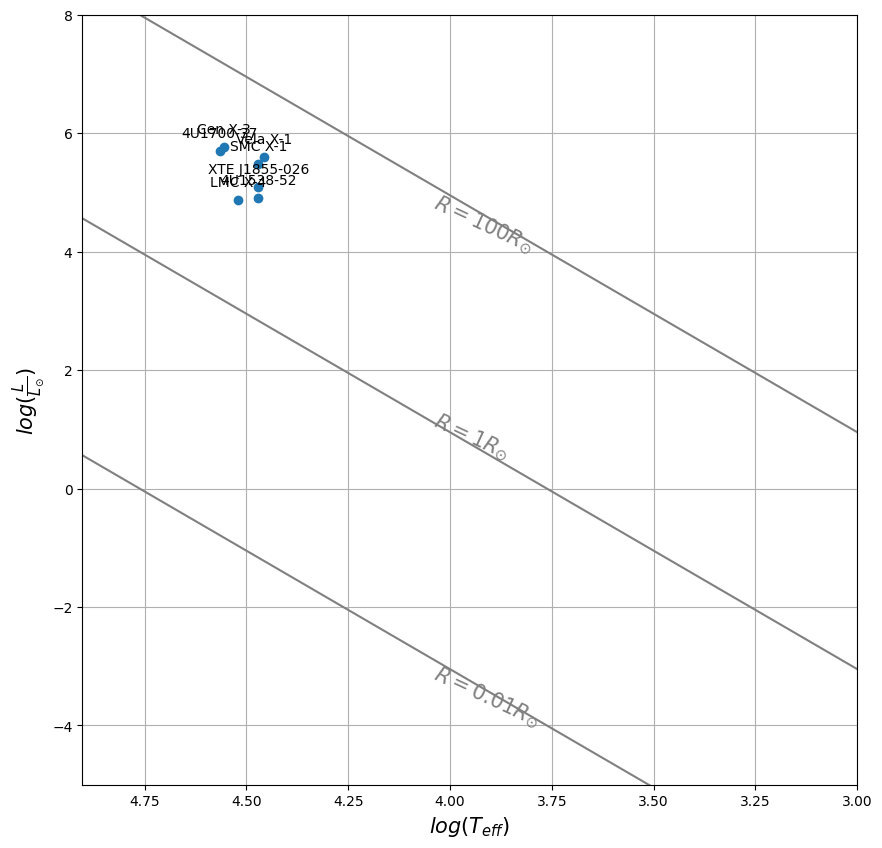

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df_MRL["logTeff"], df_MRL["logL_true/L_sun"])
plt.ylim(-5, 8)
plt.xlim(np.log10(80000),np.log10(1000))
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)

def L(Teff, R):
    # Some constants
    sigma = 5.67e-8 # W m-2 k-4
    Rsun = 696340000 # m
    Lsun = 3.86e26 # W

    return np.log10((4 * np.pi * sigma * Rsun**2) / Lsun) + 2 * np.log10(R) + 4 * np.log10(Teff)

radii = [0.01, 1, 100] # Solar radii
T_cR = [10**3, 10**5]
log_T_cR = [3, 5]
L_cR = []

for R in radii:
    save = []
    for T in T_cR:
        save.append(L(T, R))
    L_cR.append(save)

for L in L_cR:
    plt.plot(log_T_cR, L, color='grey')

for i, label in enumerate(df_MRL["id"].tolist()):
    plt.annotate(label, (df_MRL["logTeff"].tolist()[i], df_MRL["logL_true/L_sun"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add text with radii to lines
plt.text(4.05, 4, s=r'$R = 100R_{\odot}$', rotation=-25, fontsize=15, color='grey')
plt.text(4.05, 0.5, s=r'$R = 1R_{\odot}$', rotation=-25, fontsize=15, color='grey')
plt.text(4.05, -4, s=r'$R = 0.01R_{\odot}$', rotation=-25, fontsize=15, color='grey')

plt.grid(True)
plt.show()